In [9]:
# !pip install pandas
# !pip install numpy
# !pip install sklearn 
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
  Using cached scikit_learn-1.1.3-cp311-cp311-macosx_10_9_x86_64.whl (8.6 MB)
  Using cached scipy-1.9.3-cp311-cp311-macosx_10_9_x86_64.whl (34.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  DEPRECATION: sklearn is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for sklearn ... done

[notice] A new release of pip available:

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Wine_Quality.csv')

In [8]:
df_train, df_test = train_test_split(df, 
                                     test_size = 0.15, 
                                     stratify=df['quality'], 
                                     shuffle=True, random_state=42)
df_train.shape, df_test.shape

((1359, 12), (240, 12))

In [10]:
X_train = df_train.copy()
y_train = X_train.pop('quality')

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
std = StandardScaler()
lbl = LabelEncoder()
X_train = std.fit_transform(X_train)
y_train = lbl.fit_transform(y_train)

Randomized Search CV

In [13]:
from sklearn.ensemble import RandomForestClassifier
              
rfc = RandomForestClassifier(random_state=42)

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

parameters_space = {'max_depth' : range(20, 80),
                    'min_samples_leaf' : range(1, 10),
                    'min_samples_split' : range(2, 10),
                    'n_estimators' : np.arange(100, 200, 10),
                    'criterion' : ['gini', 'entropy']}

rscv = RandomizedSearchCV(rfc, 
                          parameters_space, 
                          n_iter=100, 
                          cv=5, 
                          scoring = make_scorer(f1_score, average='macro'), 
                          verbose=3, random_state=42)

In [47]:
rscv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=gini, max_depth=41, min_samples_leaf=9, min_samples_split=5, n_estimators=150;, score=0.308 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=41, min_samples_leaf=9, min_samples_split=5, n_estimators=150;, score=0.256 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=41, min_samples_leaf=9, min_samples_split=5, n_estimators=150;, score=0.292 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=41, min_samples_leaf=9, min_samples_split=5, n_estimators=150;, score=0.278 total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=41, min_samples_leaf=9, min_samples_split=5, n_estimators=150;, score=0.332 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=0.337 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=21, min_samples_leaf=2, min_samples_split=8, n_estimators=100;, score=0.272 total time=   0.3s

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=16,
                                                    min_samples_leaf=2,
                                                    random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(20, 80),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190])},
                   random_state=42,
                   scoring=make_scorer(f1_score, average=macro), verbose=3)

In [48]:
results = pd.DataFrame(rscv.cv_results_)
results[['params','mean_test_score','std_test_score', 'rank_test_score']].sort_values('mean_test_score', ascending=False)

,params,mean_test_score,std_test_score,rank_test_score
55,"{'n_estimators': 170, 'min_samples_split': 3, ...",0.329987,0.015362,1
68,"{'n_estimators': 140, 'min_samples_split': 3, ...",0.328822,0.015086,2
33,"{'n_estimators': 160, 'min_samples_split': 2, ...",0.328393,0.013803,3
13,"{'n_estimators': 190, 'min_samples_split': 6, ...",0.326697,0.021130,4
12,"{'n_estimators': 100, 'min_samples_split': 4, ...",0.325138,0.015453,5
...,...,...,...,...
95,"{'n_estimators': 180, 'min_samples_split': 3, ...",0.289485,0.027260,96
75,"{'n_estimators': 180, 'min_samples_split': 9, ...",0.289485,0.027260,96
87,"{'n_estimators': 120, 'min_samples_split': 5, ...",0.289414,0.025039,98
37,"{'n_estimators': 120, 'min_samples_split': 7, ...",0.289414,0.025039,98


Non Supervisé

In [49]:
df = pd.read_csv('/content/sample_data/mnist_test.csv', header=None)
X = df.copy()
Y = X.pop(0)

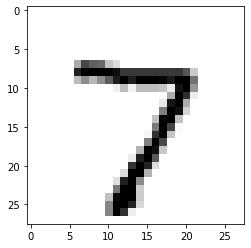

In [54]:
import matplotlib.pyplot as plt
line_0 = X.iloc[0].to_numpy()
line_0_reshape = line_0.reshape(28,28)
plt.imshow(line_0_reshape, cmap='binary')

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(X)
x_pca = pca.transform(X)

In [61]:
x_pca

array([[-411.26129651, -686.56020228],
       [  58.06705806,  983.17423779],
       [-935.10613911,  459.07305534],
       ...,
       [-282.41786221, -550.85542313],
       [-287.27112597,  155.8554826 ],
       [1144.17073029,   22.71829188]])

In [77]:
df_pca = pd.DataFrame(np.concatenate([x_pca, Y.to_numpy()[...,np.newaxis]], axis = 1), columns = ['x','y','label'])
df_pca

,x,y,label
0,-411.261297,-686.560202,7.0
1,58.067058,983.174238,2.0
2,-935.106139,459.073055,1.0
3,1255.664838,-106.989732,0.0
4,132.886642,-744.540966,4.0
...,...,...,...
9995,327.694714,559.443207,2.0
9996,531.398697,740.335523,3.0
9997,-282.417862,-550.855423,4.0
9998,-287.271126,155.855483,5.0


In [82]:
df_pca['label'] = df_pca['label'].astype('category')

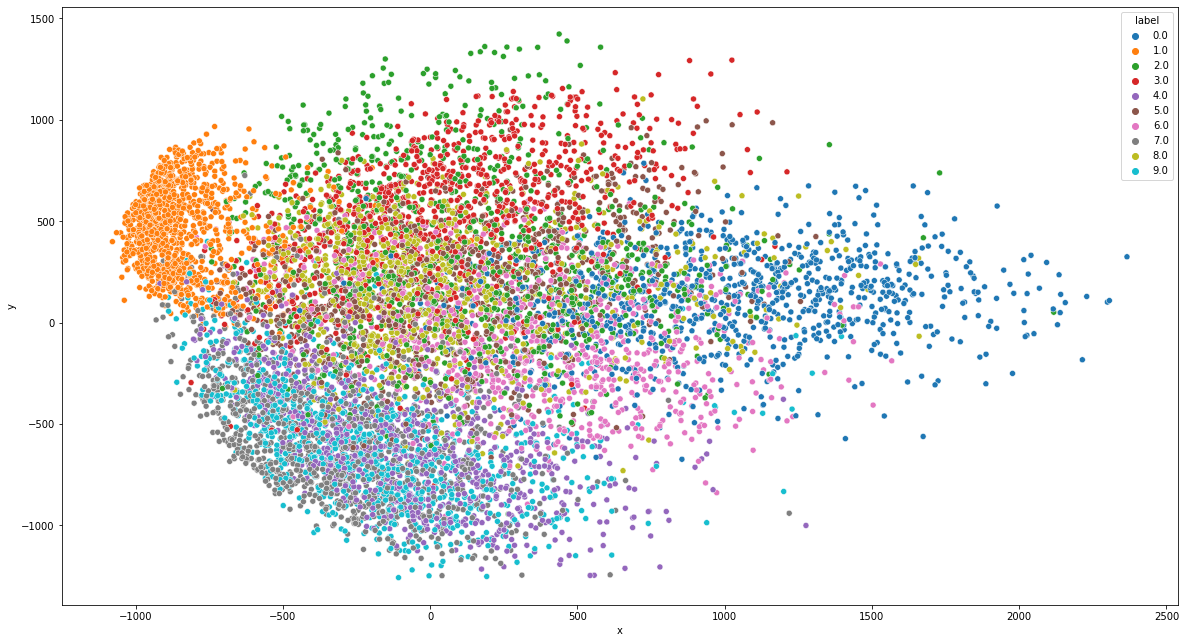

In [85]:
import seaborn as sns
plt.figure(figsize=(20,11))
sns.scatterplot(data=df_pca,x='x',y='y', hue='label')

In [89]:
from sklearn.manifold import TSNE
import time
tsne = TSNE(n_components=2)

t0 = time.time()
x_tsne = tsne.fit_transform(X)
print(time.time() - t0)

df_tsne = pd.DataFrame(np.concatenate([x_tsne, Y.to_numpy()[...,np.newaxis]], axis = 1), columns = ['x','y','label'])
df_tsne

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


106.8280131816864


,x,y,label
0,-65.084862,-5.140616,7.0
1,-4.537857,-56.057026,2.0
2,-27.042166,-59.401539,1.0
3,58.617943,-0.907562,0.0
4,-17.040682,53.028118,4.0
...,...,...,...
9995,10.465532,-51.994213,2.0
9996,41.227177,-14.532224,3.0
9997,-24.619904,18.214937,4.0
9998,-1.536866,26.499691,5.0


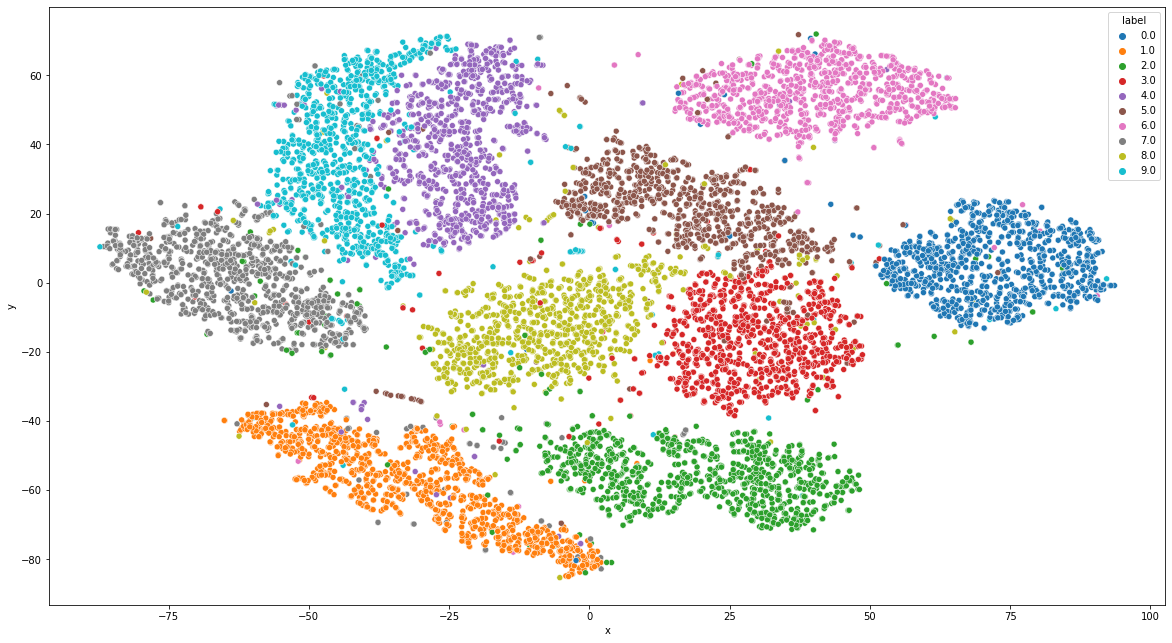

In [100]:
plt.figure(figsize=(20,11))
sns.scatterplot(data=df_tsne,x='x',y='y', hue='label', palette = sns.color_palette("tab10"))

In [96]:
tsne = TSNE(n_components=2)
pca = PCA(n_components=0.95)

t0 = time.time()
x_pca = pca.fit_transform(X)
x_tsne = tsne.fit_transform(x_pca)
print(time.time() - t0)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


99.30579280853271


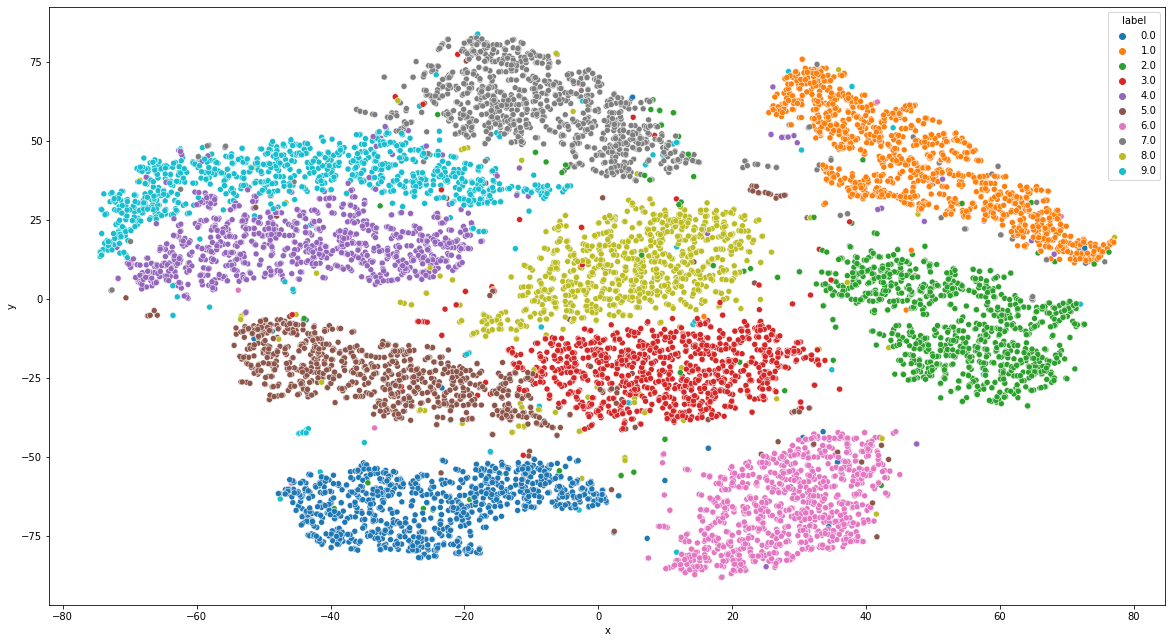

In [99]:
df_pcatsne = pd.DataFrame(np.concatenate([x_tsne, Y.to_numpy()[...,np.newaxis]], axis = 1), columns = ['x','y','label'])
plt.figure(figsize=(20,11))
sns.scatterplot(data=df_pcatsne,x='x',y='y', hue='label', palette=sns.color_palette("tab10"))

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
from sklearn.manifold import TSNE


In [22]:
X_embedded = TSNE(n_components=2
                    ).fit_transform(digits['data'])
X_embedded

/Users/constantinbogdanas/.pyenv/versions/3.11.0a6/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/constantinbogdanas/.pyenv/versions/3.11.0a6/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[  9.892787  , -64.609474  ],
       [-17.287369  ,  10.502035  ],
       [ -2.0597897 , -10.118955  ],
       ...,
       [  1.2547127 ,   0.6690763 ],
       [ 36.52119   ,  -0.67431927],
       [  6.9185057 ,  -2.167619  ]], dtype=float32)

In [59]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(digits['data'])
array = np.array([[ 0.,  0.,  0.,  1., 14., 13.,  1.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  3.,  0.,  0.,  5., 11., 15., 16., 16.,  0.,  0.,  0.,  4.,
       15., 16., 16., 15.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  7.,  0.,
        0.,  0.,  0.,  0., 10., 16.,  3.,  0.,  0.,  0.,  0.,  0.,  8.,
       16.,  6.,  0.,  0.,  0.,  0.,  0.,  2., 13., 15.,  2.,  0.]])

kmeans.predict(array)


array([6], dtype=int32)

TypeError: Invalid shape (1797, 8, 8) for image data

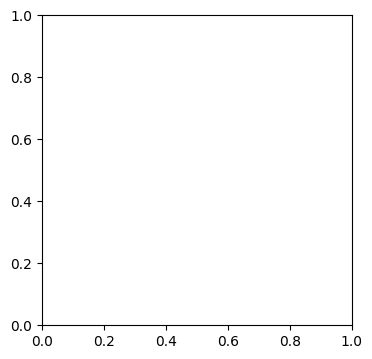

In [58]:
import matplotlib.pyplot as plt
digits['data'][80]
plt.matshow(digits.images)
plt.show()

In [105]:
import seaborn as sns
np_dig= np.array((digits.data)[digits.target.astype(int)])

df_kmeans = pd.DataFrame(np_dig, columns = ['x','y','label'])
df_kmeans


ValueError: Shape of passed values is (1797, 64), indices imply (1797, 3)

In [112]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import time

tsne = TSNE(n_components=2)
pca = PCA(n_components=0.95)

t0 = time.time()
x_pca = pca.fit_transform(digits.data)
x_tsne = tsne.fit_transform(x_pca)
print(time.time() - t0)
clustering = AgglomerativeClustering().fit(digits.data)

/Users/constantinbogdanas/.pyenv/versions/3.11.0a6/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/constantinbogdanas/.pyenv/versions/3.11.0a6/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


4.86416482925415


In [109]:
clustering.get_params()

{'affinity': 'euclidean',
 'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'n_clusters': 2}